In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = 20
vel = {0:"u", 1:"v", 2:"w"}

In [7]:
u =  np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_u_y20_all_out.npy")

In [16]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
# for i in range(3):
#     gt = np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_{vel[i]}_y{y}_all_out.npy")
#     gen = np.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/vf_fm/exps/exp_3/samples_9iter_640.npy")[:, i:i+1]
#     gt_train = gt[:36000]
#     gt_test = gt[36000:]
#     train_hist = np.histogram(gt_train.flatten(), bins=100, density=True)
#     test_hist = np.histogram(gt_test.flatten(), bins=100, density=True)
#     gen_hist = np.histogram(gen.flatten(), bins=100, density=True)
#     axes[i].plot((train_hist[1][:-1] + train_hist[1][1:])/2, train_hist[0], label="train")
#     axes[i].plot((test_hist[1][:-1] + test_hist[1][1:])/2, test_hist[0], label="test", linestyle="--")
#     axes[i].plot((gen_hist[1][:-1] + gen_hist[1][1:])/2, gen_hist[0], label="gen", linestyle=":", color="black")
# plt.legend()
# plt.show()

In [15]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
# for i in range(3):
#     gt = np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_{vel[i]}_y{y}_all_out.npy")
#     gen = np.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/vf_fm/exps/exp_6/samples_5iter_640.npy")[:, i:i+1]
#     gt_train = gt[:36000]
#     gt_test = gt[36000:]
#     train_hist = np.histogram(gt_train.flatten(), bins=100, density=True)
#     test_hist = np.histogram(gt_test.flatten(), bins=100, density=True)
#     gen_hist = np.histogram(gen.flatten(), bins=100, density=True)
#     axes[i].plot((train_hist[1][:-1] + train_hist[1][1:])/2, train_hist[0], label="train")
#     axes[i].plot((test_hist[1][:-1] + test_hist[1][1:])/2, test_hist[0], label="test", linestyle="--")
#     axes[i].plot((gen_hist[1][:-1] + gen_hist[1][1:])/2, gen_hist[0], label="gen", linestyle=":", color="black")
# plt.legend()
# plt.show()

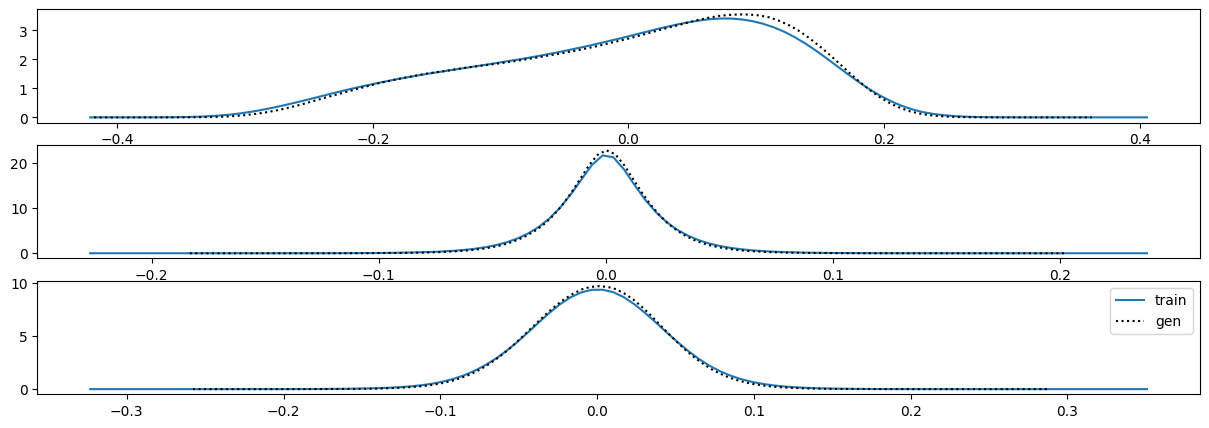

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
for i in range(3):
    gt = np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_{vel[i]}_y{y}_all_out.npy")
    gen = np.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/vf_fm/exps/exp_3/samples_9iter_640.npy")[:, i:i+1]
    train_hist = np.histogram(gt.flatten(), bins=100, density=True)
    gen_hist = np.histogram(gen.flatten(), bins=100, density=True)
    axes[i].plot((train_hist[1][:-1] + train_hist[1][1:])/2, train_hist[0], label="train")
    axes[i].plot((gen_hist[1][:-1] + gen_hist[1][1:])/2, gen_hist[0], label="gen", linestyle=":", color="black")
plt.legend()
plt.show()

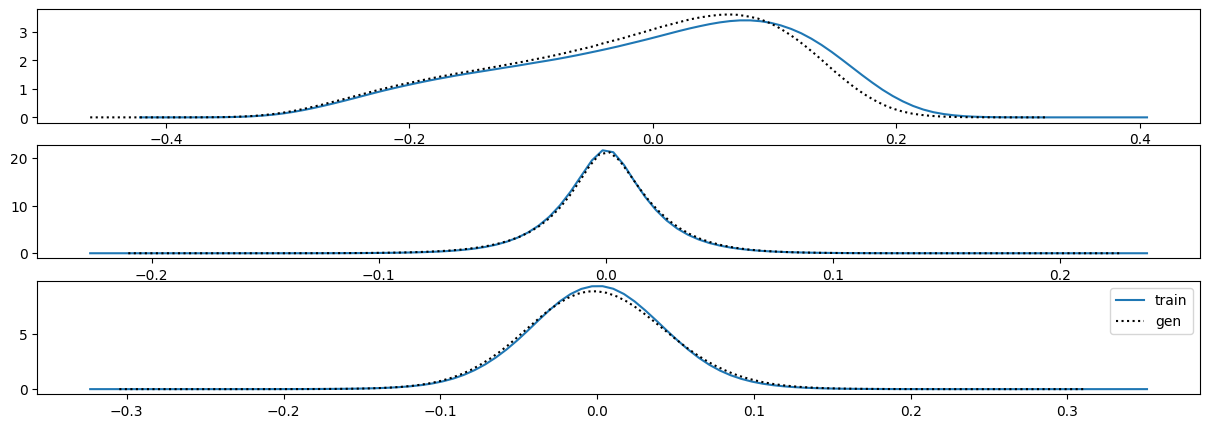

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
for i in range(3):
    gt = np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_{vel[i]}_y{y}_all_out.npy")
    gen = np.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/vf_fm/exps/exp_6/samples_5iter_640.npy")[:, i:i+1]
    train_hist = np.histogram(gt.flatten(), bins=100, density=True)
    gen_hist = np.histogram(gen.flatten(), bins=100, density=True)
    axes[i].plot((train_hist[1][:-1] + train_hist[1][1:])/2, train_hist[0], label="train")
    axes[i].plot((gen_hist[1][:-1] + gen_hist[1][1:])/2, gen_hist[0], label="gen", linestyle=":", color="black")
plt.legend()
plt.show()